In [25]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


from pandas import ExcelWriter
from pandas import ExcelFile
%matplotlib inline

In [26]:
# importing or loading the dataset 
winedata = pd.read_excel('D:\data\wine.xlsx', sheet_name='wine') 

In [27]:
# distributing the dataset into two components X and Y 
X = winedata.iloc[0:, 0:13].values 
y = winedata.iloc[0:, 13].values 

In [32]:
# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [36]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [39]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = classifier.predict(X_test) 

In [41]:
# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

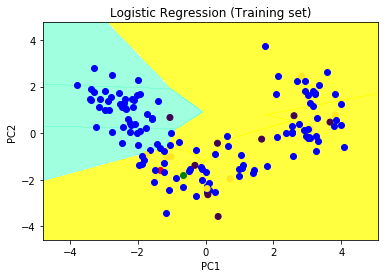

In [59]:
# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel

# plt.legend() # to show legend

# show scatter plot
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)